In this notebook we generate the carbon curves for each case and compare the results obtained from ws3 with libCBM.

# Set up environment for each case study

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import ws3.forest
import time
import gurobipy as grb
import pickle
import os
from util import plugin_c_curves, carbon_curve_points, compare_ws3_cbm, cbm_report

# compile_scenario_maxstock, plot_scenario_maxstock, cbm_report, plugin_c_curves, compare_ws3_cbm, compile_events, cbm_report_both, run_cbm_emissionstock

In [2]:
def select_case_study(case_study):
    print(f"Selected scenario: {case_study}")
case_study_dropdown = widgets.Dropdown(
    options=['mining_site_1', 'mining_site_2', 'mining_site_3', 'test'],
    value='test',
    description='Case Study:'
)
display(case_study_dropdown)
case_study_dropdown.observe(lambda change: select_case_study(change['new']), names='value')

Dropdown(description='Case Study:', index=3, options=('mining_site_1', 'mining_site_2', 'mining_site_3', 'test…

In [3]:
case_study = case_study_dropdown.value

In [4]:
#Start Calculating the Running Time
Start = time.time()

In [5]:
base_year = 2020
horizon = 10
period_length = 10
max_age = 1000
# n_steps = 100
tvy_name = 'totvol'

In [6]:
# Define case study mappings
case_study_options = {
    'mining_site_1': {
        'model_name': 'mining_site_1',
        'model_path': './data/woodstock_model_files_mining_site_1'
    },
    'mining_site_2': {
        'model_name': 'mining_site_2',
        'model_path': './data/woodstock_model_files_mining_site_2'
    },
    'mining_site_3': {
        'model_name': 'mining_site_3',
        'model_path': './data/woodstock_model_files_mining_site_3'
    },
    'test': {
        'model_name': 'mining_site_3',
        'model_path': './data/woodstock_model_files_mining_site_3_test'
    }
}

# Retrieve model details based on case study
model_info = case_study_options.get(case_study)

if model_info:
    model_name = model_info['model_name']
    model_path = model_info['model_path']
else:
    print('The case study name is not valid')


## Create and Run `ForestModel` instance

In [7]:
fm = ws3.forest.ForestModel(model_name=model_name,
                            model_path=model_path,
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)
fm.import_landscape_section()
fm.import_areas_section()
fm.import_yields_section()
fm.import_actions_section()
fm.import_transitions_section()
fm.initialize_areas()
fm.add_null_action()
fm.reset_actions()
fm.grow()

## Generate and Add Carbon Yield Curves

In [8]:
c_curves_p, c_curves_f, cbm_output = carbon_curve_points(fm)

### No-harvesting

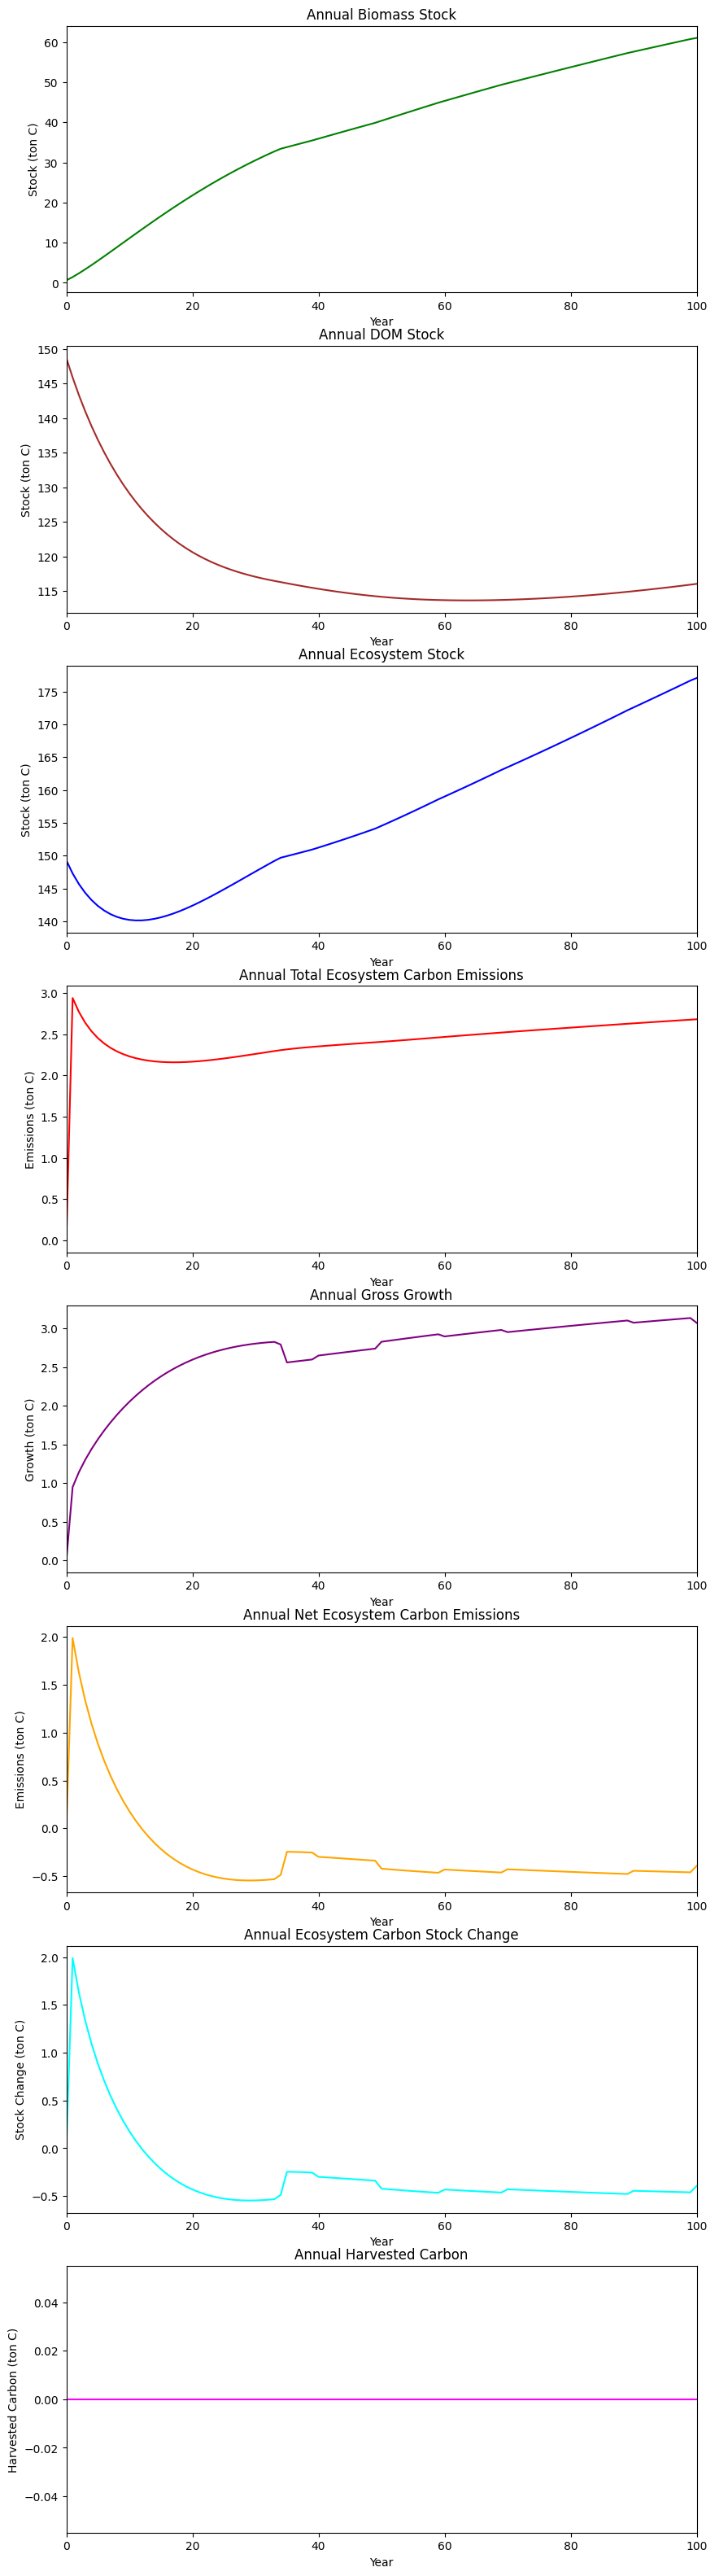

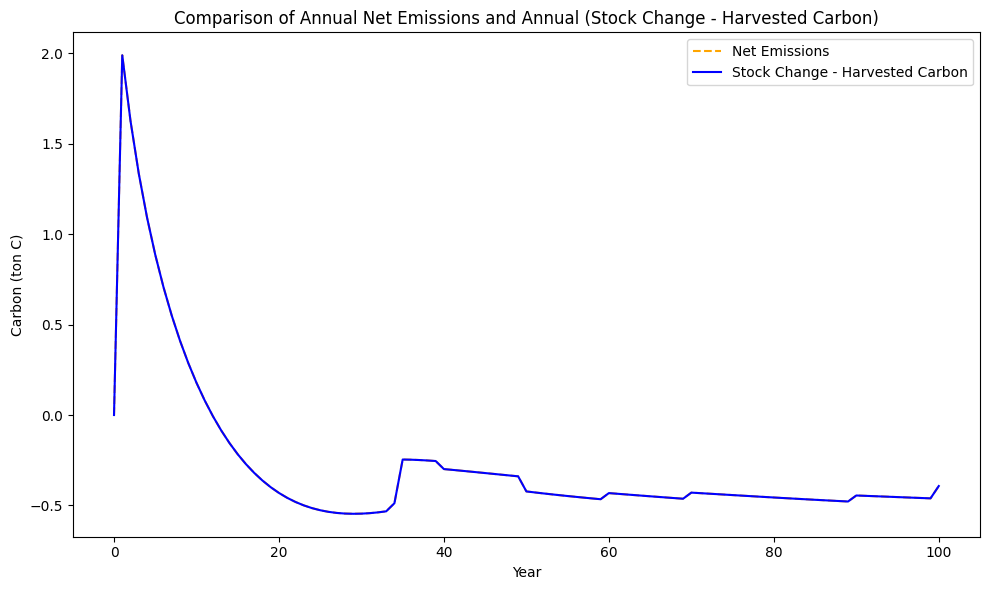

,Biomass,DOM,Ecosystem,All_Emissions,Gross_Growth,Net_Emissions,Harvested_Carbon,Stock_Change,Stock_Change_minus_Harvested_Carbon
Year,,,,,,,,,
0,0.598223,148.688416,149.286639,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1.425991,145.871285,147.297277,2.938317,0.948955,1.989362,0.0,1.989362,1.989362
2,2.359417,143.311503,145.670920,2.769552,1.143195,1.626357,0.0,1.626357,1.626357
3,3.360585,140.974650,144.335235,2.638109,1.302424,1.335685,0.0,1.335685,1.335685
4,4.408365,138.833654,143.242018,2.534775,1.441559,1.093217,0.0,1.093217,1.093217
...,...,...,...,...,...,...,...,...,...
96,59.689108,115.589801,175.278909,2.661061,3.116596,-0.455535,0.0,-0.455535,-0.455535
97,60.037326,115.698885,175.736211,2.665952,3.123254,-0.457302,0.0,-0.457302,-0.457302
98,60.385022,115.810247,176.195268,2.670828,3.129886,-0.459057,0.0,-0.459057,-0.459057


In [9]:
cbm_report(fm, cbm_output)

In [10]:
# Use pickle.dump, to store the curves
file_directory = "./data/curves"
os.makedirs(file_directory, exist_ok=True)

file_data = {
    f"{case_study}_c_curves_p.pkl": c_curves_p,
    f"{case_study}_c_curves_f.pkl": c_curves_f
}

for filename, data in file_data.items():
    file_path = os.path.join(file_directory, filename)
    with open(file_path, 'wb') as file:
        pickle.dump(data, file)
    print(f"File saved at {file_path}")


File saved at ./data/curves/test_c_curves_p.pkl
File saved at ./data/curves/test_c_curves_f.pkl


In [11]:
# Plug carbon yield curves into forest model
plugin_c_curves(fm, c_curves_p, c_curves_f)

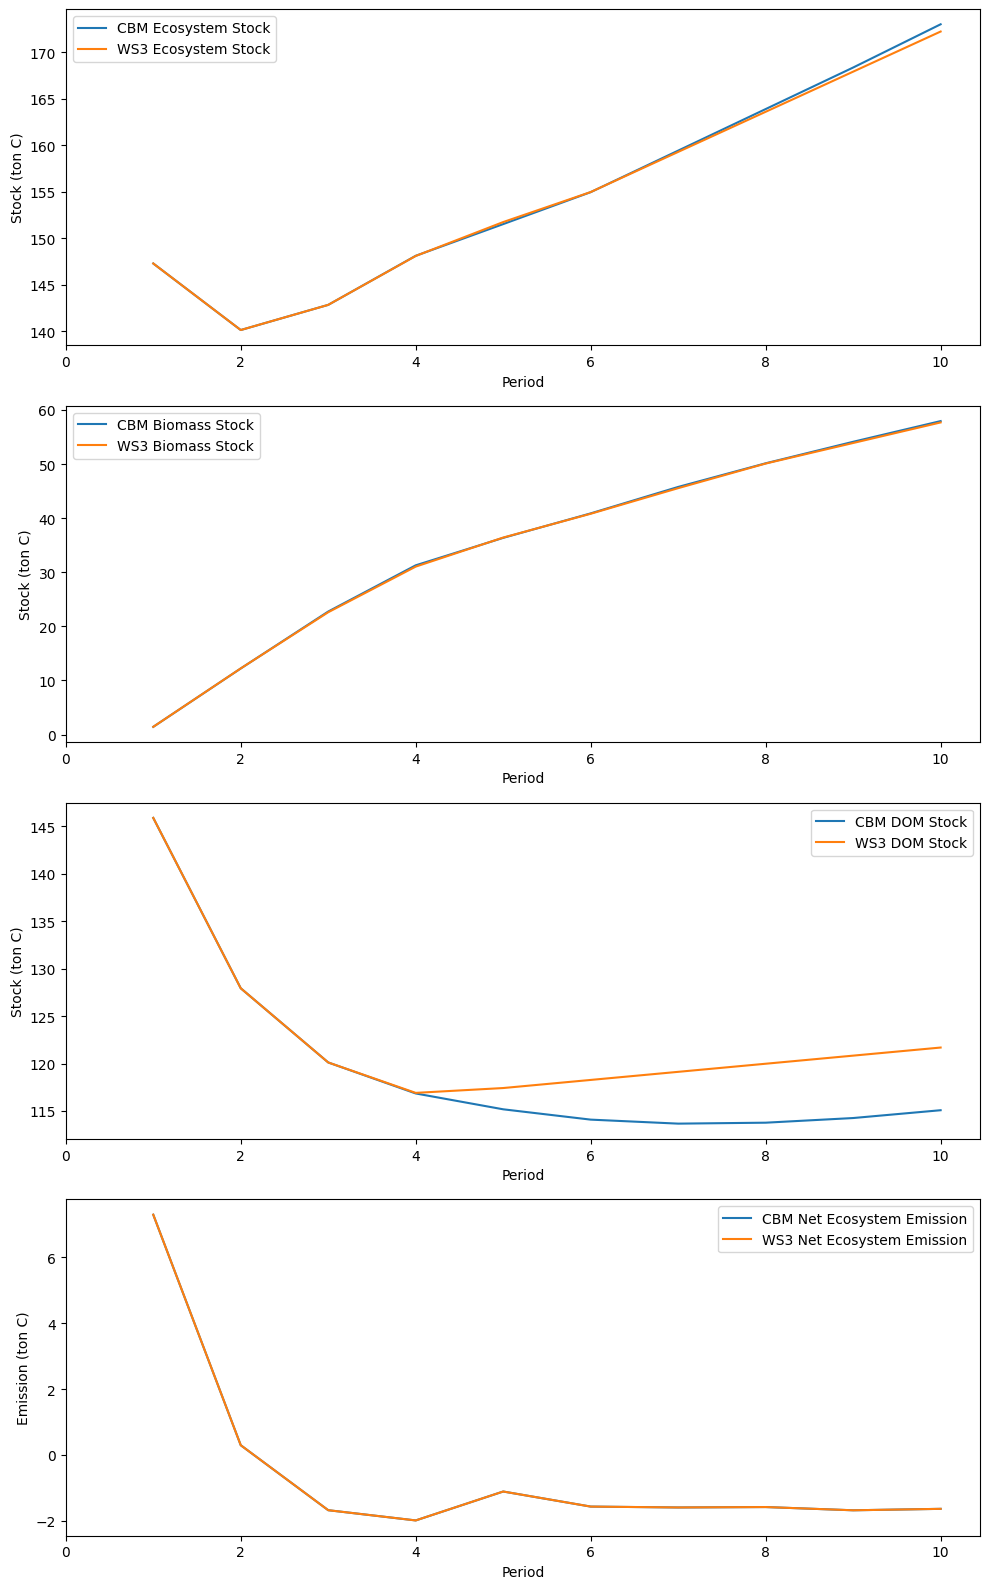

(   period  biomass_stock   dom_stock   eco_stock  total_emission  \
 0       1       1.425991  145.871285  147.297277       10.773830   
 1       2      12.216141  127.925020  140.141161        8.100525   
 2       3      22.738206  120.109478  142.847683        7.964714   
 3       4      31.279952  116.844679  148.124632        8.330160   
 4       5      36.356700  115.175885  151.532585        8.645467   
 5       6      40.879661  114.088861  154.968523        8.846447   
 6       7      45.767698  113.666607  159.434305        9.066074   
 7       8      50.136422  113.766280  163.902702        9.279206   
 8       9      54.112593  114.256576  168.369169        9.475605   
 9      10      57.939955  115.079056  173.019010        9.666118   
 
    gross_growth  harvested_carbon  net_emission  
 0      3.479501               0.0      7.294328  
 1      7.806228               0.0      0.294297  
 2      9.643713               0.0     -1.678998  
 3     10.319844               0.0 

In [12]:
compare_ws3_cbm(fm, cbm_output, plots='individual')

In [13]:
print('It took', round((time.time() - Start) / 60, 1), "minutes to run this script.")

It took 0.2 minutes to run this script.
